In [109]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [110]:
credit = pd.read_csv("C:/Users/GC/creditcard.csv")

In [112]:
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000000,-1.3598071,-0.0727812,2.5363467,1.3781552,-0.3383208,0.4623878,0.2395986,0.0986979,0.3637870,...,-0.0183068,0.2778376,-0.1104739,0.0669281,0.1285394,-0.1891148,0.1335584,-0.0210531,149.6200000,0
1,0.0000000,1.1918571,0.2661507,0.1664801,0.4481541,0.0600176,-0.0823608,-0.0788030,0.0851017,-0.2554251,...,-0.2257752,-0.6386720,0.1012880,-0.3398465,0.1671704,0.1258945,-0.0089831,0.0147242,2.6900000,0
2,1.0000000,-1.3583541,-1.3401631,1.7732093,0.3797796,-0.5031981,1.8004994,0.7914610,0.2476758,-1.5146543,...,0.2479982,0.7716794,0.9094123,-0.6892810,-0.3276418,-0.1390966,-0.0553528,-0.0597518,378.6600000,0
3,1.0000000,-0.9662717,-0.1852260,1.7929933,-0.8632913,-0.0103089,1.2472032,0.2376089,0.3774359,-1.3870241,...,-0.1083005,0.0052736,-0.1903205,-1.1755753,0.6473760,-0.2219288,0.0627228,0.0614576,123.5000000,0
4,2.0000000,-1.1582331,0.8777368,1.5487178,0.4030339,-0.4071934,0.0959215,0.5929407,-0.2705327,0.8177393,...,-0.0094307,0.7982785,-0.1374581,0.1412670,-0.2060096,0.5022922,0.2194222,0.2151531,69.9900000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,"172,786.0000000",-11.8811179,10.0717850,-9.8347835,-2.0666557,-5.3644728,-2.6068373,-4.9182154,7.3053340,1.9144283,...,0.2134541,0.1118637,1.0144799,-0.5093485,1.4368069,0.2500343,0.9436512,0.8237310,0.7700000,0
284803,"172,787.0000000",-0.7327887,-0.0550805,2.0350297,-0.7385886,0.8682294,1.0584153,0.0243297,0.2948687,0.5848000,...,0.2142053,0.9243836,0.0124630,-1.0162257,-0.6066240,-0.3952551,0.0684725,-0.0535274,24.7900000,0
284804,"172,788.0000000",1.9195650,-0.3012538,-3.2496398,-0.5578281,2.6305151,3.0312601,-0.2968265,0.7084172,0.4324540,...,0.2320450,0.5782290,-0.0375009,0.6401339,0.2657455,-0.0873706,0.0044548,-0.0265608,67.8800000,0
284805,"172,788.0000000",-0.2404400,0.5304825,0.7025102,0.6897992,-0.3779611,0.6237077,-0.6861800,0.6791455,0.3920867,...,0.2652449,0.8000487,-0.1632979,0.1232052,-0.5691589,0.5466685,0.1088207,0.1045328,10.0000000,0


In [113]:
X_train, X_test = train_test_split(credit, test_size=0.2, random_state=42)
X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, X_test.shape

((182276, 31), (45569, 31), (56962, 31))

In [114]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
272615,"165,180.0000000",-3.0173328,3.2159501,-2.8445902,-1.3418557,-0.4917295,-1.7761973,0.0713596,1.4703710,0.0700871,...,0.2585438,0.8433967,0.0865030,0.0262280,0.0825024,0.1125164,0.6184747,0.4547817,0.7700000,0
191231,"129,171.0000000",2.0998085,-0.8900999,-2.8173185,-1.2086732,0.8450429,0.1386991,0.0647511,-0.0092822,-0.9747757,...,0.5670822,1.6218036,-0.2429697,-1.5816747,0.5221561,0.4151642,-0.0704275,-0.1183900,48.0000000,0
53595,"46,061.0000000",0.8123518,-0.5869093,-0.6675144,0.9628640,0.4012483,0.7216817,0.3431615,0.1212388,0.0590511,...,0.0844764,-0.1444366,-0.4870094,-1.3129400,0.8062429,-0.2025557,-0.0273045,0.0240487,230.5700000,0
193549,"130,180.0000000",-2.6212629,-4.4394321,-2.5954402,-1.1171926,2.4896330,-2.6253219,1.2077720,-0.4575768,-1.3538219,...,1.2654366,1.8723097,1.8625660,0.6156074,-0.5945142,-0.1726198,0.1996389,0.4856474,588.1500000,0
207723,"136,809.0000000",2.2273595,-1.5723160,-0.3717717,-1.5786788,-1.5934667,-0.1578628,-1.5982950,0.0044218,-1.0746215,...,0.0894990,0.8528659,0.0988886,-0.3056891,-0.1785135,0.0090998,0.0450076,-0.0531448,19.9800000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131478,"79,616.0000000",-0.8779133,-0.3018311,2.7354726,1.2534041,-1.1459416,0.0680371,-0.0769448,0.1797774,0.6016914,...,0.2646665,0.9316410,0.1439160,1.0330127,-0.1173421,0.7533197,0.1043141,0.1520183,133.5000000,0
239193,"150,000.0000000",-1.6622788,-0.2784221,2.6778751,1.4797239,-0.6418207,0.4210096,-1.1620158,0.9462430,0.7055214,...,0.3188634,0.7479400,-0.3282714,-0.0047660,0.4292885,-0.2201094,0.0570004,-0.1058679,37.9000000,0
67705,"52,666.0000000",-1.0614971,0.9789017,1.6292684,-1.3858566,-0.0748045,-1.0544684,0.8935885,-0.3049631,0.3963044,...,-0.1913849,-0.1438214,-0.0806262,0.4484294,-0.2301796,0.6971315,0.3062245,0.1151825,25.0000000,0
233557,"147,611.0000000",2.0818363,-0.1287302,-1.4976877,0.0492902,0.4631127,-0.2601995,0.0906358,-0.1393367,0.3050022,...,-0.3004501,-0.7623384,0.1838925,-1.0886784,-0.1757477,0.2436052,-0.0751660,-0.0791099,8.9900000,0


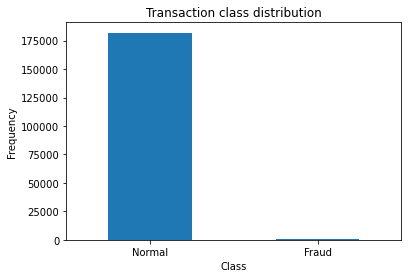

In [116]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(X_train['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [119]:
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

X_val = X_val[X_val.Class == 0]
X_val = X_val.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_val = X_val.values
X_test = X_test.values

In [120]:
# Normalize the above splits using the MinMaxScaler from the scikit learn package
scaler = MinMaxScaler()

# Make sure to only fit the scaler on the training data
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.transform(X_test)

In [121]:
X_train.shape

(181946, 30)

In [123]:
NUM_COL = 30

In [124]:
#Setting the Hyperparameters

#learning_rate = 0.00001
learning_rate = 0.0001
batch_size = 512
epochs = 5
adam = Adam(learning_rate = learning_rate, beta_1 = 0.5)

In [125]:
# Defining the Generator network

def get_generator(optimizer):
    
    generator = Sequential()
    generator.add(Dense(64, input_dim=NUM_COL, kernel_initializer=initializers.glorot_normal(seed=42)))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(128))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(256))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(256))
    generator.add(Activation('tanh'))
       
    generator.add(Dense(512))
    generator.add(Activation('tanh'))
   
    generator.add(Dense(NUM_COL, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    
    return generator

In [126]:
##### Defining the Discriminator network

def get_discriminator(optimizer):
    
    discriminator = Sequential()
    
    discriminator.add(Dense(256, input_dim=NUM_COL, kernel_initializer=initializers.glorot_normal(seed=42)))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
       
    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(1))
    discriminator.add(Activation('sigmoid'))
   
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

    return discriminator

In [127]:
def get_gan_network(discriminator, generator, optimizer,input_dim=NUM_COL):

    discriminator.trainable = False   
    gan_input = Input(shape=(input_dim,))  
    x = generator(gan_input)        
    gan_output = discriminator(x)
    
    gan = Model(inputs=gan_input, outputs=gan_output)    
    gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    
    
    return gan

In [128]:
#Training the GAN

#Calculating the number of batches based on the batch size
batch_count = X_train.shape[0] // batch_size
pbar = tqdm(total= epochs * batch_count)
gan_loss = []
discriminator_loss = []

#Inititalizing the network
generator = get_generator(adam)
discriminator = get_discriminator(adam)
gan = get_gan_network(discriminator, generator, adam,input_dim=NUM_COL)


for epoch in range(epochs):        
    for index in range(batch_count):        
        pbar.update(1)        
        # Creating a random set of input noise and images
        noise = np.random.normal(0, 1, size=[batch_size,NUM_COL])
        
        # Generate fake samples
        generated_images = generator.predict_on_batch(noise)
        
        #Obtain a batch of normal network packets
        image_batch = X_train[index * batch_size: (index + 1) * batch_size]
            
        X = np.vstack((generated_images,image_batch))       
        y_dis = np.ones(2*batch_size) 
        y_dis[:batch_size] = 0

        # Train discriminator
        discriminator.trainable = True
        d_loss= discriminator.train_on_batch(X, y_dis)

        # Train generator
        noise = np.random.uniform(0, 1, size=[batch_size, NUM_COL])
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, y_gen)
        
        #Record the losses
        discriminator_loss.append(d_loss)
        gan_loss.append(g_loss)
        
    print("Epoch %d Batch %d/%d [D loss: %f] [G loss:%f]" % (epoch,index,batch_count, d_loss, g_loss))              

 20%|███████▊                               | 358/1775 [00:25<01:28, 15.98it/s]

Epoch 0 Batch 354/355 [D loss: 0.052572] [G loss:0.008299]


 40%|███████████████▋                       | 714/1775 [00:48<01:07, 15.80it/s]

Epoch 1 Batch 354/355 [D loss: 0.000040] [G loss:12.873345]


 60%|██████████████████████▊               | 1068/1775 [01:10<00:45, 15.52it/s]

Epoch 2 Batch 354/355 [D loss: 0.000010] [G loss:14.202536]


 80%|██████████████████████████████▍       | 1422/1775 [01:32<00:22, 15.76it/s]

Epoch 3 Batch 354/355 [D loss: 0.000076] [G loss:14.254631]


100%|█████████████████████████████████████▉| 1774/1775 [01:54<00:00, 14.28it/s]

Epoch 4 Batch 354/355 [D loss: 0.000010] [G loss:16.518398]


100%|██████████████████████████████████████| 1775/1775 [02:12<00:00, 14.28it/s]

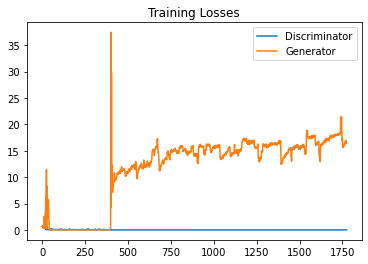

In [129]:
fig, ax = plt.subplots()
plt.plot(discriminator_loss, label='Discriminator')
plt.plot(gan_loss, label='Generator')
plt.title("Training Losses")
plt.legend()

In [ ]:
# Predictions on the test set

nr_batches_test = np.ceil(X_test.shape[0] // batch_size).astype(np.int32)

results =[]

for t in range(nr_batches_test +1):    
        ran_from = t * batch_size
        ran_to = (t + 1) * batch_size
        image_batch = X_test[ran_from:ran_to]             
        tmp_rslt = discriminator.predict(x=image_batch,batch_size=128,verbose=0)        
        results = np.append(results, tmp_rslt)   

100%|██████████████████████████████████████| 5300/5300 [17:19<00:00,  5.10it/s]


In [ ]:
results

In [103]:
y2 = y_test.to_numpy()

In [104]:
pd.options.display.float_format = '{:20,.7f}'.format
results_df = pd.concat([pd.DataFrame(results),pd.DataFrame(y2)], axis=1)
results_df.columns = ['results','y_test']
print ('Mean score for Normal data :', results_df.loc[results_df['y_test'] == 1, 'results'].mean() )
print ('Mean score for Fall data :', results_df.loc[results_df['y_test'] == 0, 'results'].mean())

Mean score for Normal data : 0.4994703642574338
Mean score for Fall data : 0.49966860271558106


In [105]:
#Obtaining the lowest 1% score
per = np.percentile(results,1)
y_pred = results.copy()
y_pred = np.array(y_pred)

#Thresholding based on the score
inds = (y_pred > per)
inds_comp = (y_pred <= per)
y_pred[inds] = 0
y_pred[inds_comp] = 1

In [106]:
precision, recall, f1,_ = precision_recall_fscore_support(y_test,y_pred,average='binary')
print ('Accuracy Score :',accuracy_score(y_test, y_pred) )
print ('Precision :',precision )
print ('Recall :',recall )
print ('F1 :',f1 )

Accuracy Score : 0.49730588235294115
Precision : 0.45251396648044695
Recall : 0.00902147215888108
F1 : 0.017690265181557984


Confusion Matrix :


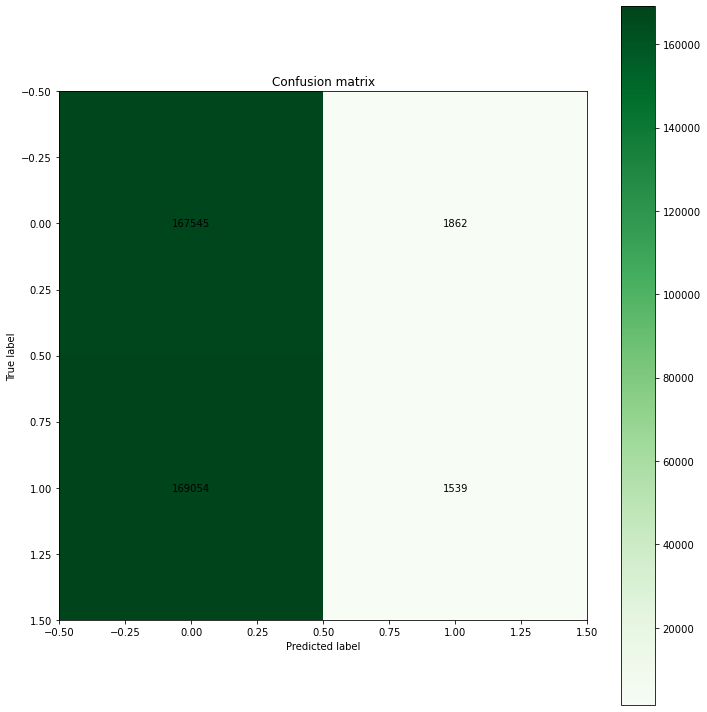

In [107]:
cm = confusion_matrix(y_test, y_pred)

print ('Confusion Matrix :')

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greens):
    plt.figure(figsize=(10,10),)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(cm)

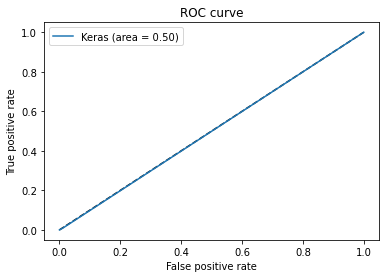

In [108]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.2f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()